Decision Tree Accuracy: 1.0

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Random Forest Accuracy: 1.0

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



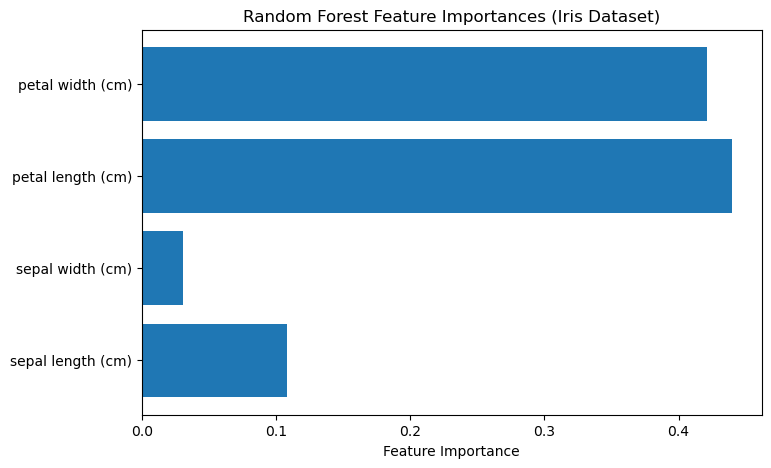

In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)

# Initialize a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# Evaluate both models
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_preds))
print("\nClassification Report (Decision Tree):")
print(classification_report(y_test, dt_preds))

print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, rf_preds))

# Feature importances (optional visualization)
import matplotlib.pyplot as plt

# Plot feature importances from Random Forest
feature_names = iris.feature_names
importances = rf.feature_importances_

plt.figure(figsize=(8, 5))
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances (Iris Dataset)")
plt.show()

Accuracy: 0.6271820448877805

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.76      0.73       156
           1       0.59      0.54      0.56       232
           2       0.58      0.56      0.57       230
           3       0.66      0.72      0.69       184

    accuracy                           0.63       802
   macro avg       0.63      0.64      0.64       802
weighted avg       0.62      0.63      0.62       802



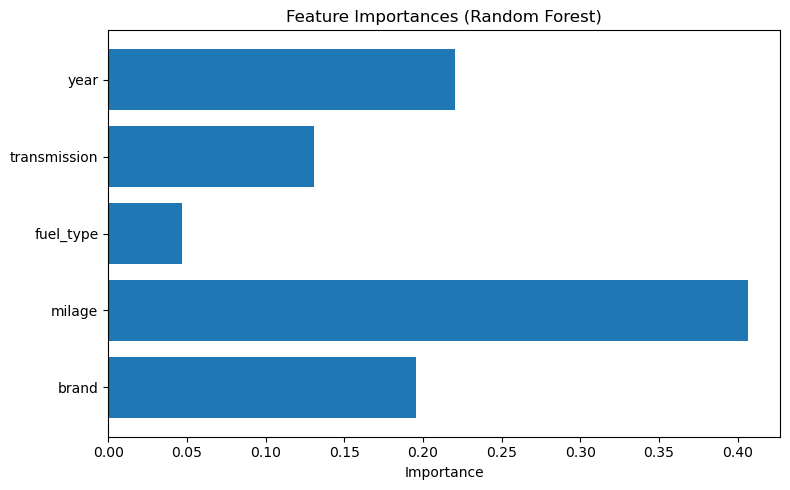

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

file_path = ("/Users/anirudhravipudi/Desktop/AI/Practice/used_cars.csv")
df = pd.read_csv(file_path)

# 🧹 Clean 'price' and 'milage' columns
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df['milage'] = df['milage'].replace('[\, mi\.]', '', regex=True).astype(float)
df = df.dropna(subset=['price', 'milage'])

# 🎯 Create price range labels
def get_price_range(price):
    if price < 15000:
        return 0  # Budget
    elif 15000 <= price < 30000:
        return 1  # Mid-Range
    elif 30000 <= price < 50000:
        return 2  # Luxury
    else:
        return 3  # Premium-Luxury

df['price_range'] = df['price'].apply(get_price_range)

# 📊 Feature selection
df['year'] = df['model_year']
features = ['brand', 'milage', 'fuel_type', 'transmission', 'year']
X = df[features]
y = df['price_range']

# 🔠 Encode categorical variables
X_encoded = X.copy()
for col in X.select_dtypes(include=['object']).columns:
    X_encoded[col] = LabelEncoder().fit_transform(X[col])

# 🏋️ Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# 🌲 Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 🔮 Predictions
y_pred = rf.predict(X_test)

# ✅ Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 📌 Feature Importance
importances = rf.feature_importances_
feature_names = X_encoded.columns

# Plot
plt.figure(figsize=(8, 5))
plt.barh(feature_names, importances)
plt.xlabel("Importance")
plt.title("Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()